In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
import os

In [43]:
directory_path = "../experiment/"

# Get all CSV file names in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith(".csv")]
dataframes = []
for file in csv_files:
    file_path = os.path.join(directory_path, file)
    dataframe = pd.read_csv(file_path)
    dataframes.append(dataframe)
df = pd.concat(dataframes, ignore_index=True)


In [44]:
gaze_methods = ['LookAhead', 'Rotating', 'Oxford', 'Owl', 'NoControl']
planners = ['Jerk_Primitive', 'Primitive', 'MPC']
agent_numbers = [5, 10, 15]
pillar_numbers = [0, 5, 10]
agent_max_speeds = [20, 30, 40]
drone_max_speeds = [20, 30, 40]

result_df = {
    'Method':[],
    'Planner':[],
    'Number of agents':[],
    'Number of pillars':[],
    'Agent speed':[],
    'Drone speed':[]
}
result_df = pd.DataFrame([], columns=['Method', 
                                      'Planner', 
                                      'Number of agents', 
                                      'Number of pillars', 
                                      'Agent speed', 
                                      'Drone speed',
                                      'Total samples',
                                      'Success',
                                      'Static collision',
                                      'Dynamic collision',
                                      'Area covered per step',
                                      'Agent tracked per step',
                                      'Agent tracking time'])
result_df
# df.T.plot(kind='bar', title='From Mon To Fri')
# plt.show()

,Method,Planner,Number of agents,Number of pillars,Agent speed,Drone speed,Total samples,Success,Static collision,Dynamic collision,Area covered per step,Agent tracked per step,Agent tracking time


In [46]:
result_df = pd.DataFrame([], columns=['Method', 
                                      'Planner', 
                                      'Number of agents', 
                                      'Number of pillars', 
                                      'Agent speed', 
                                      'Drone speed',
                                      'Total samples',
                                      'Success',
                                      'Static collision',
                                      'Dynamic collision',
                                      'Area covered per step',
                                      'Agent tracked per step',
                                      'Agent tracking time'])
for gaze_method in gaze_methods:
    for agent_number in agent_numbers:
        for pillar_number in pillar_numbers:
            for agent_speed in agent_max_speeds:
                for drone_speed in drone_max_speeds:
                    for planner in planners:
                        df_i = df[(df['Method'] == gaze_method) &
                                  (df['Planner'] == planner) &
                                  (df['Number of agents']==agent_number) & 
                                  (df['Number of pillars']==pillar_number) &
                                  (df['Agent speed']==agent_speed) &
                                  (df['Drone speed']==drone_speed) &
                                  (df['Steps'] >= 10)].copy(deep=True)
                        if df_i.shape[0] != 0:
                            # df_i.loc[df['Agent tracked']==0,'Agent tracked time'] = 0
                            df_i.loc[:,'Total track time'] = df_i.loc[:,'Agent tracked time']*df_i.loc[:,'Agent tracked']
                            # print(df_i)
                            result_df.loc[len(result_df)] = [
                                gaze_method,
                                planner,
                                agent_number,
                                pillar_number,
                                agent_speed,
                                drone_speed,
                                df_i.shape[0], #total samples
                                df_i['Success'].sum(),#total success
                                df_i['Static Collision'].sum(),
                                df_i['Dynamic Collision'].sum(),
                                df_i['Grid discovered'].sum() / df_i['Steps'].sum(),
                                100 * df_i['Agent tracked'].sum() / df_i['Steps'].sum(),
                                df_i['Total track time'].sum() / (df_i['Agent tracked']).sum()
                            ]
result_df['Success rate'] = result_df['Success'] / result_df['Total samples']
result_df.to_csv('./post.csv')                            

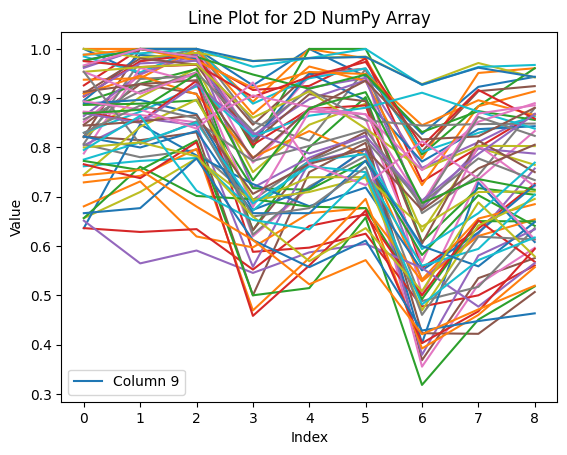

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Read the data from a CSV file into a pandas dataframe
df = result_df.sort_values(by=['Method',
                               'Planner',
                               'Number of agents', 
                               'Number of pillars', 
                               'Agent speed', 
                               'Drone speed'])

# Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# Extract the relevant data for the plot
z = df['Success rate'].to_numpy().reshape(-1, 9)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each row as a line
for i in range(z.shape[0]):
    ax.plot(z[i, :])

# Add a legend for each column
for i in range(z.shape[1]):
    ax.legend(['Column ' + str(i+1)])

# Set the title and labels for the plot
ax.set_title('Line Plot for 2D NumPy Array')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

# Show the plot
plt.show()

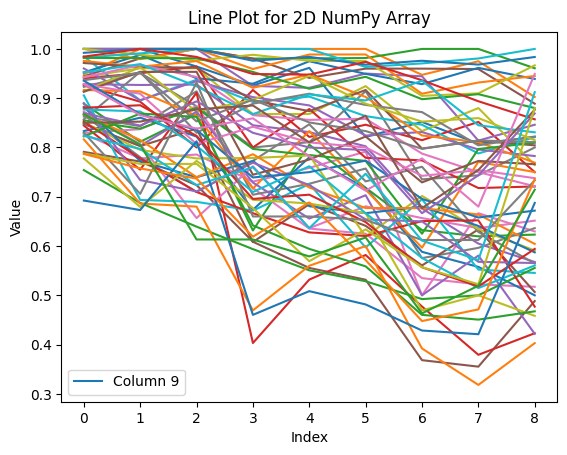

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Read the data from a CSV file into a pandas dataframe
df = result_df.sort_values(by=['Method',
                               'Planner', 
                               'Agent speed', 
                               'Drone speed',
                               'Number of agents', 
                               'Number of pillars'])

# Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# Extract the relevant data for the plot
z = df['Success rate'].to_numpy().reshape(-1, 9)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each row as a line
for i in range(z.shape[0]):
    ax.plot(z[i, :])

# Add a legend for each column
for i in range(z.shape[1]):
    ax.legend(['Column ' + str(i+1)])

# Set the title and labels for the plot
ax.set_title('Line Plot for 2D NumPy Array')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

# Show the plot
plt.show()

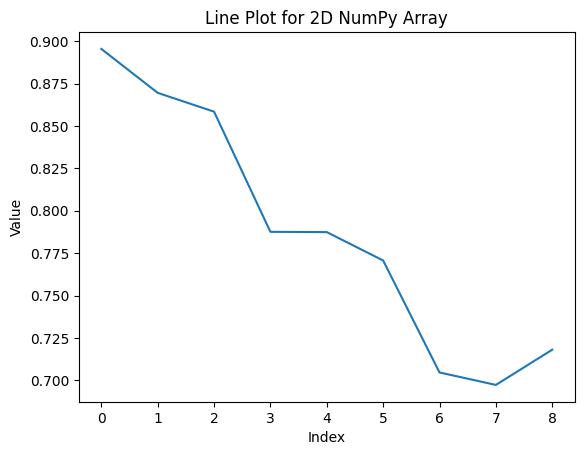

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Read the data from a CSV file into a pandas dataframe
df = result_df.sort_values(by=['Method',
                               'Planner', 
                               'Agent speed', 
                               'Drone speed',
                               'Number of agents', 
                               'Number of pillars'])

# Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# Extract the relevant data for the plot
z = df['Success rate'].to_numpy().reshape(-1, 9)
z = z.sum(axis=0) / z.shape[0]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each row as a line
# for i in range(z.shape[0]):
#     ax.plot(z[i, :])

ax.plot(z)

# Add a legend for each column
# for i in range(z.shape[1]):
#     ax.legend(['Column ' + str(i+1)])

# Set the title and labels for the plot
ax.set_title('Line Plot for 2D NumPy Array')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

# Show the plot
plt.show()